## Lab | Web Scraping Single Page

- Loading the libraries

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import math
import warnings

warnings.filterwarnings('ignore')

- Getting the page

In [3]:
#I first tried to do it with this page but kept getting empty outputs https://www.afrocharts.com/chart?id=countryWeeklyTopSongs-cog
r = requests.get('https://www.billboard.com/charts/hot-100/')
r.status_code

200

b'<!DOCTYPE html>\n<!--[if IE 6]>\n<html id="ie6" lang="en-US">\n<![endif]-->\n<!--[if IE 7]>\n<html id="ie7" lang="en-US">\n<![endif]-->\n<!--[if IE 8]>\n<html id="ie8" lang="en-US">\n<![endif]-->\n<!--[if !(IE 6) | !(IE 7) | !(IE 8) ]><!-->\n<html lang="en-US">\n<!--<![endif]-->\n<head>\n\t<meta charset="UTF-8"/>\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\t<meta name="theme-color" content="#ffffff">\n\t<meta name="viewport" content="width=device-width, initial-scale=1.0"/>\t\n<!-- Add to home screen for iOS -->\n<meta name="apple-mobile-web-app-status-bar-style" content="black-translucent">\n<link rel="apple-touch-icon" sizes="180x180" href="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/icons/apple-touch-icon.png">\n\n<!-- Tile icons for Windows -->\n<meta name="msapplication-config" content="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/browserconfig.xml">\n<meta name="msapplication-TileImage" c
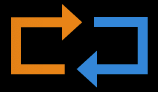

In [4]:
html = r.content
html

<!DOCTYPE html>

<!--[if IE 6]>
<html id="ie6" lang="en-US">
<![endif]-->
<!--[if IE 7]>
<html id="ie7" lang="en-US">
<![endif]-->
<!--[if IE 8]>
<html id="ie8" lang="en-US">
<![endif]-->
<!--[if !(IE 6) | !(IE 7) | !(IE 8) ]><!-->
<html lang="en-US">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="#ffffff" name="theme-color"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport">
<!-- Add to home screen for iOS -->
<meta content="black-translucent" name="apple-mobile-web-app-status-bar-style"/>
<link href="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/icons/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
<!-- Tile icons for Windows -->
<meta content="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/browserconfig.xml" name="msapplication-config"/>
<meta content="https://www.billboard.com/wp-content/themes/vip/pmc-bil
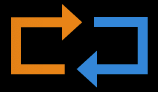

In [5]:
#parsing
soup = BeautifulSoup(html, 'html.parser')
soup

In [6]:
#i dont really understand the difference between this one and the next one
print(soup.get_text())

























Billboard Hot 100 – Billboard




 





















































































 

























































 





 




 
















































×


 


 


 



















×




			Skip to main content		


















 Billboard








	Charts



	Music



	Culture



	Media



	Business




















		LOGIN	
Login






Click to Expand Search Input





Search for:











			Account
			






	Manage Account




		Log Out	











	Account
















Open menu




Search



Click to Expand Search Input











 Billboard


 Billboard






Search



Click to Expand Search Input





Search for:











		LOGIN	
Login















			Account
			






	Manage Account




		Log Out	











	Account










Search



Click to Expand Search Input















	Charts



	Music



	Culture



	Media



	Business














In [7]:
for a_tag in soup.select('a'):
    print(a_tag.get_text())

×

			Skip to main content		

 Billboard


	Charts

	Music

	Culture

	Media

	Business

	Manage Account

	Account

 Billboard


 Billboard


	Manage Account

	Account

	Charts

	Music

	Culture

	Media

	Business

	Latin Women in Music

	Chart Beat

	Samsung NXT

	Hot Trending Songs

	Global

	Español

 Billboard


 Billboard


	Manage Account

	Account

	Charts

	Music

	Culture

	Media

	Business



	All Charts
	


	All Charts
	

Menu





	Hot 100

	Billboard 200

	Global 200

	View All

Close





Datepicker





Info





	see charts legends

Share





Share this article on Facebook





Share this article on Twitter





Share this article on Flipboard





Share this article on Pinit





+ additional share options added





Share this article on Tumblr





Share this article on Reddit





Share this article on Linkedin





Share this article on Whatsapp





Share this article on Email





Print this article





Share this article on Comment





Menu





	Hot 100

	Bi

- Navigation

In [8]:
print("The content of the html title is: ",soup.title.string)
print()

The content of the html title is:  Billboard Hot 100 – Billboard



In [9]:
print("The paragraphs of the hmtl are: ",soup.p)
print()

The paragraphs of the hmtl are:  <p class="c-tagline a-font-primary-s lrv-u-padding-b-1">THE WEEK’S MOST POPULAR CURRENT SONGS ACROSS ALL GENRES, RANKED BY STREAMING ACTIVITY FROM DIGITAL MUSIC SOURCES TRACKED BY LUMINATE, RADIO AIRPLAY AUDIENCE IMPRESSIONS AS MEASURED BY LUMINATE AND SALES DATA AS COMPILED BY LUMINATE.</p>



In [10]:
#checking if there are links
for i in range(len(soup.find_all("a"))):
    print("The link is: ",soup.find_all("a")[i].get("href"))

The link is:  #
The link is:  #pagetop
The link is:  https://www.billboard.com/
The link is:  /charts
The link is:  https://www.billboard.com/c/music/
The link is:  https://www.billboard.com/c/culture/
The link is:  https://www.billboard.com/c/media/
The link is:  /pro
The link is:  /my-account
The link is:  /my-account
The link is:  https://www.billboard.com/
The link is:  https://www.billboard.com/
The link is:  /my-account
The link is:  /my-account
The link is:  /charts
The link is:  https://www.billboard.com/c/music/
The link is:  https://www.billboard.com/c/culture/
The link is:  https://www.billboard.com/c/media/
The link is:  /pro
The link is:  https://www.billboard.com/t/bb-mujeres-latinas/
The link is:  /c/business/chart-beat/
The link is:  /music/features/nyla-xo-billboard-samsung-nxt-winner-cover-story-interview-1235286810/
The link is:  /music/music-news/billboard-hot-trending-songs-powered-by-twitter-9649287/
The link is:  /t/global/
The link is:  https://www.billboard.com

 - Handling the data

In [11]:
#creating lists
songs = []
artists = []

In [37]:
for artists in soup.find_all('span', attrs={'class': 'c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only'}):
    print(artists.get_text())


	
	Luke Combs


	
	Rema & Selena Gomez


	
	Miley Cyrus


	
	Lil Durk Featuring J. Cole


	
	Toosii


	
	Taylor Swift Featuring Ice Spice


	
	SZA


	
	Metro Boomin, The Weeknd & 21 Savage


	
	Eslabon Armado X Peso Pluma


	
	Miguel


	
	Taylor Swift


	
	SZA


	
	Zach Bryan


	
	The Weeknd & Ariana Grande


	
	Gunna


	
	Jelly Roll


	
	Taylor Swift


	
	Yng Lvcas x Peso Pluma


	
	Morgan Wallen


	
	Grupo Frontera X Bad Bunny


	
	Morgan Wallen


	
	Bailey Zimmerman


	
	Fifty Fifty


	
	Drake


	
	Post Malone


	
	Ed Sheeran


	
	Jordan Davis


	
	Gunna


	
	Bad Bunny


	
	Doja Cat


	
	David Guetta & Bebe Rexha


	
	Morgan Wallen


	
	Dua Lipa


	
	Tyler Hubbard


	
	Bailey Zimmerman


	
	PinkPantheress & Ice Spice


	
	Old Dominion


	
	Latto Featuring Cardi B


	
	Kali


	
	Lil Durk Featuring Morgan Wallen


	
	Gunna


	
	Megan Moroney


	
	Bizarrap & Peso Pluma


	
	Luke Combs


	
	Morgan Wallen


	
	Fuerza Regida


	
	Coi Leray


	
	Chris Brown


	
	Kane Brown With Katelyn Br

In [43]:
#I wanted to try this one, thinking i'd get a list but do not understand why I only got one
artists

<span class="c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only">
	
	Gucci Mane &amp; Lil Baby
</span>

In [44]:
#this one does work
songs

['Fast Car',
 'Calm Down',
 'Flowers',
 'All My Life',
 'Favorite Song',
 'Karma',
 'Kill Bill',
 "Creepin'",
 'Ella Baila Sola',
 'Sure Thing',
 'Anti-Hero',
 'Snooze',
 'Something In The Orange',
 'Die For You',
 'Fukumean',
 'Need A Favor',
 'Cruel Summer',
 'La Bebe',
 'You Proof',
 'Un x100to',
 "Thinkin' Bout Me",
 'Rock And A Hard Place',
 'Cupid',
 'Search & Rescue',
 'Chemical',
 'Eyes Closed',
 'Next Thing You Know',
 'Back To The Moon',
 'Where She Goes',
 'Attention',
 "I'm Good (Blue)",
 'Thought You Should Know',
 'Dance The Night',
 "Dancin' In The Country",
 'Religiously',
 "Boy's A Liar, Pt. 2",
 'Memory Lane',
 'Put It On Da Floor Again',
 'Area Codes',
 'Stand By Me',
 'Rodeo Dr',
 'Tennessee Orange',
 'Bzrp Music Sessions, Vol. 55',
 'Love You Anyway',
 'One Thing At A Time',
 'TQM',
 'Players',
 'Under The Influence',
 'Thank God',
 'Back At It',
 'Bread & Butter',
 'Princess Diana',
 'Bye',
 'Calling',
 'Daylight',
 'What It Is (Block Boy)',
 'Annihilate',
 'Bury 

In [45]:
Billboard = pd.DataFrame({"songs":songs,"artists":artists})
Billboard

songs                          artists
0        Fast Car  \n\t\n\tGucci Mane & Lil Baby\n
1       Calm Down  \n\t\n\tGucci Mane & Lil Baby\n
2         Flowers  \n\t\n\tGucci Mane & Lil Baby\n
3     All My Life  \n\t\n\tGucci Mane & Lil Baby\n
4   Favorite Song  \n\t\n\tGucci Mane & Lil Baby\n
..            ...                              ...
94   Angel, Pt. 1  \n\t\n\tGucci Mane & Lil Baby\n
95   Girl In Mine  \n\t\n\tGucci Mane & Lil Baby\n
96      Moonlight  \n\t\n\tGucci Mane & Lil Baby\n
97     Classy 101  \n\t\n\tGucci Mane & Lil Baby\n
98        Bluffin  \n\t\n\tGucci Mane & Lil Baby\n

[99 rows x 2 columns]

In [48]:
data = {'Song': songs, 'Artist': artists}
Hot100 = pd.DataFrame(data)
Hot100

Song                           Artist
0        Fast Car  \n\t\n\tGucci Mane & Lil Baby\n
1       Calm Down  \n\t\n\tGucci Mane & Lil Baby\n
2         Flowers  \n\t\n\tGucci Mane & Lil Baby\n
3     All My Life  \n\t\n\tGucci Mane & Lil Baby\n
4   Favorite Song  \n\t\n\tGucci Mane & Lil Baby\n
..            ...                              ...
94   Angel, Pt. 1  \n\t\n\tGucci Mane & Lil Baby\n
95   Girl In Mine  \n\t\n\tGucci Mane & Lil Baby\n
96      Moonlight  \n\t\n\tGucci Mane & Lil Baby\n
97     Classy 101  \n\t\n\tGucci Mane & Lil Baby\n
98        Bluffin  \n\t\n\tGucci Mane & Lil Baby\n

[99 rows x 2 columns]